In [6]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [7]:
chessdata = pd.read_csv('blitzHighingData.csv')
chessdata['Opening_new'].describe()


count                25155
unique                  90
top       Sicilian Defense
freq                  4622
Name: Opening_new, dtype: object

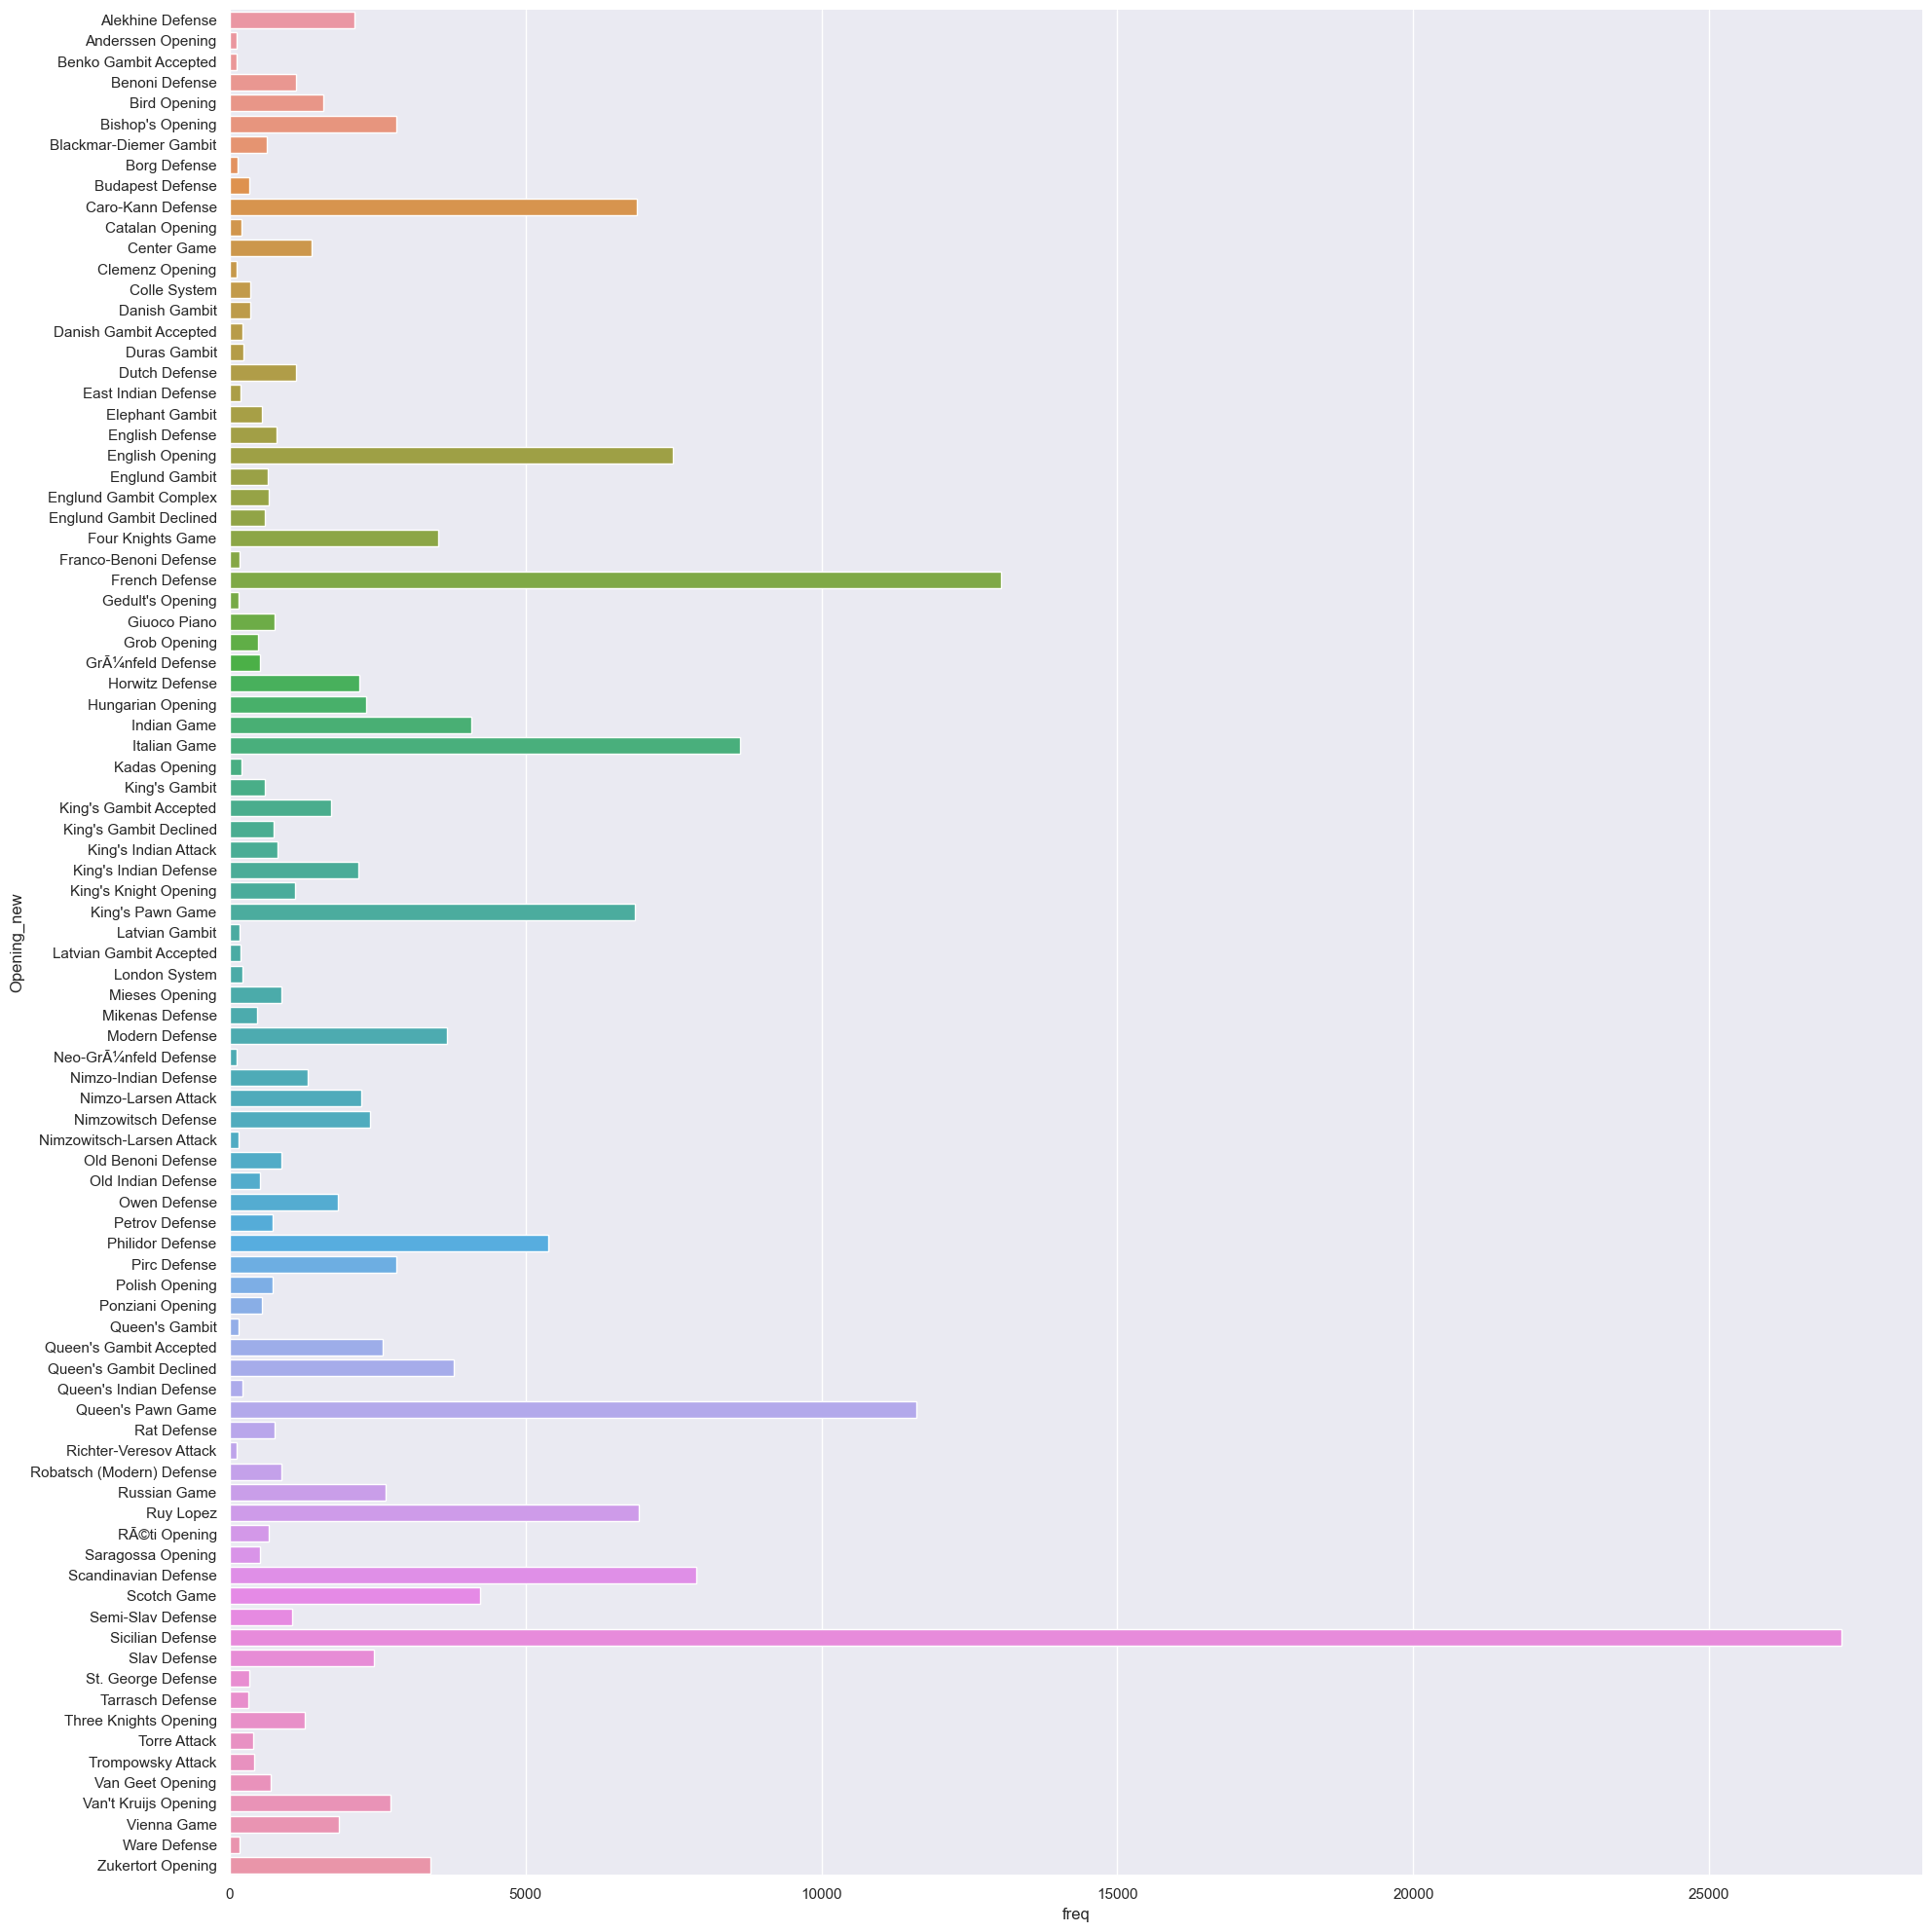

In [8]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [9]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [10]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


C:\Users\rinoa\AppData\Local\Temp\ipykernel_21036\2706443046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_21036\2706443046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Opening_new'] = temp['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
872,Mikenas Defense,22,7,0.318182
2216,East Indian Defense,36,12,0.333333
415,Van't Kruijs Opening,124,44,0.354839
711,Ponziani Opening,38,14,0.368421
1195,Richter-Veresov Attack,8,3,0.375
...,...,...,...,...
21,Nimzowitsch-Larsen Attack,24,15,0.625
140,Kadas Opening,25,16,0.64
222,Three Knights Opening,46,30,0.652174
1638,St. George Defense,35,23,0.657143


Win rate for white

In [11]:
temp = temp[temp['tot'] >100]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
415,Van't Kruijs Opening,124,44,0.354839
37,Old Benoni Defense,137,55,0.40146
27,Alekhine Defense,320,138,0.43125
135,Indian Game,772,337,0.436528
5,GrÃ¼nfeld Defense,167,73,0.437126
159,Benoni Defense,251,111,0.442231
539,Trompowsky Attack,135,60,0.444444
6,Bishop's Opening,144,64,0.444444
53,Bird Opening,255,114,0.447059
247,Four Knights Game,198,90,0.454545


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

Winrate for Black

In [12]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)


C:\Users\rinoa\AppData\Local\Temp\ipykernel_21036\4234378883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_21036\4234378883.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()


In [13]:

temp1 = temp1[temp1['tot'] >100]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
89,Semi-Slav Defense,282,102,0.361702
177,Owen Defense,141,55,0.390071
1,Philidor Defense,326,129,0.395706
46,Vienna Game,153,61,0.398693
4,Zukertort Opening,480,196,0.408333
251,Modern Defense,472,193,0.408898
19,King's Indian Defense,639,268,0.419405
13,Queen's Gambit Declined,1031,435,0.42192
2,Horwitz Defense,225,95,0.422222
419,Queen's Gambit Accepted,192,82,0.427083


Black does extremely well in the Van't Kruijs Opening, more than 5% points higher than the next best. We explained why in BlitzMid, and it is no suprise to see that a suboptimal first move suffers in the more competitive format.

In [17]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]

In [18]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))

In [19]:
chessdata.info()
chessData_num = chessdata[['ELO Diff']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    25155 non-null  int64  
 1   BlackElo      25155 non-null  int64  
 2   ECO           25155 non-null  object 
 3   Event         25155 non-null  object 
 4   Opening       25155 non-null  object 
 5   Result        25155 non-null  object 
 6   Termination   25155 non-null  object 
 7   TimeControl   25155 non-null  object 
 8   WhiteElo      25155 non-null  int64  
 9   BlackTitle    368 non-null    object 
 10  WhiteTitle    331 non-null    object 
 11  Move_ply_200  33 non-null     object 
 12  Category      25155 non-null  object 
 13  Opening_new   25155 non-null  object 
 14  freq          25155 non-null  int64  
 15  ELO Diff      25155 non-null  int64  
 16  Ave ELO       25155 non-null  float64
 17  tot           25155 non-null  int64  
dtypes: float64(1), int64(6), o

In [20]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [21]:
chessdata.info()
chessData_num = chessdata[['ELO Diff']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    25155 non-null  int64  
 1   BlackElo      25155 non-null  int64  
 2   ECO           25155 non-null  object 
 3   Event         25155 non-null  object 
 4   Opening       25155 non-null  object 
 5   Result        25155 non-null  object 
 6   Termination   25155 non-null  object 
 7   TimeControl   25155 non-null  object 
 8   WhiteElo      25155 non-null  int64  
 9   BlackTitle    368 non-null    object 
 10  WhiteTitle    331 non-null    object 
 11  Move_ply_200  33 non-null     object 
 12  Category      25155 non-null  object 
 13  Opening_new   25155 non-null  object 
 14  freq          25155 non-null  int64  
 15  ELO Diff      25155 non-null  int64  
 16  Ave ELO       25155 non-null  float64
 17  tot           25155 non-null  int64  
dtypes: float64(1), int64(6), o

In [22]:


# Extract Response and Predictors
y = pd.DataFrame(chessData_ohe['Result'])
X = pd.DataFrame(chessData_ohe.drop('Result', axis = 1))


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6)

In [23]:
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

Train Data
Accuracy  :	 0.5644593366651522



In [25]:
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

Test Data
Accuracy  :	 0.5471048098582219



[Text(0.5476485148514851, 0.9285714285714286, 'ELO Diff <= 49.5\ngini = 0.536\nsamples = 17608\nvalue = [8069, 698, 8841]\nclass = White'),
 Text(0.27970297029702973, 0.7857142857142857, 'ELO Diff <= -97.5\ngini = 0.535\nsamples = 12787\nvalue = [6471, 497, 5819]\nclass = Black'),
 Text(0.15099009900990099, 0.6428571428571429, 'ELO Diff <= -160.5\ngini = 0.493\nsamples = 2957\nvalue = [1855, 114, 988]\nclass = Black'),
 Text(0.07920792079207921, 0.5, 'ELO Diff <= -309.5\ngini = 0.456\nsamples = 1673\nvalue = [1135, 58, 480]\nclass = Black'),
 Text(0.039603960396039604, 0.35714285714285715, 'Opening_new_Slav Defense <= 0.5\ngini = 0.374\nsamples = 429\nvalue = [326, 9, 94]\nclass = Black'),
 Text(0.019801980198019802, 0.21428571428571427, 'Opening_new_Colle System <= 0.5\ngini = 0.368\nsamples = 423\nvalue = [324, 9, 90]\nclass = Black'),
 Text(0.009900990099009901, 0.07142857142857142, 'gini = 0.365\nsamples = 422\nvalue = [324, 8, 90]\nclass = Black'),
 Text(0.0297029702970297, 0.0714

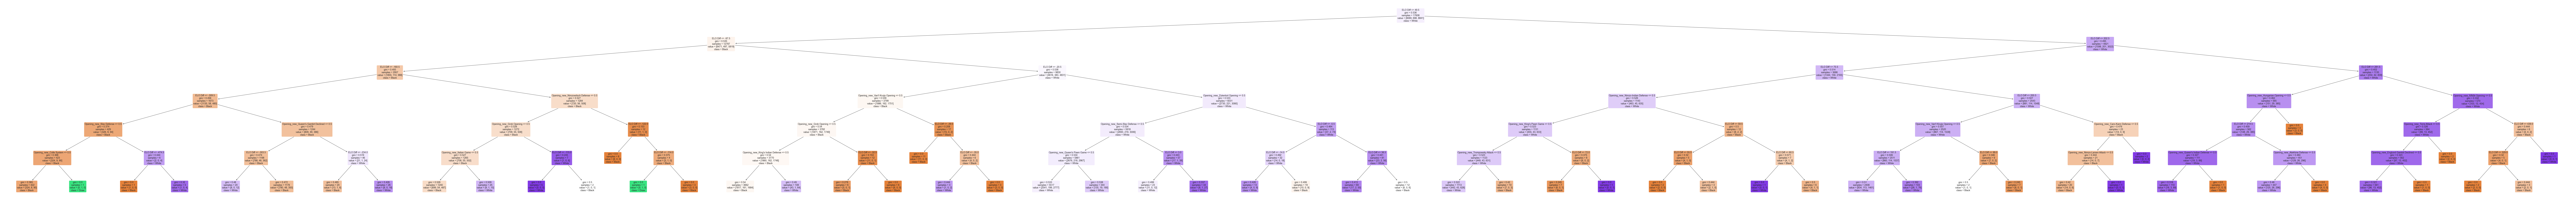

In [24]:
f = plt.figure(figsize=(256,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])

This gives us a very simple tree where the alg branches out outlier opennings that perform exceptionally well for one side regardless of difference in ranking. Already, we see white has an advantage, though not by much, with a winrate of 50.8%, so .

Strongest for black is the Van 't Kruijs Opening, which was singled out in the mid ranking data as well, as a subpar openning for white at best, intending to confuse the opponent by taking them out of preparation immediately. Regardless, out of 93, black wins 60 of all such games, so we conclude that the mind games alone are not worth the loss in tempo in this opening, even in more competitive ranks.

Next is the Alekhine's Defense, from Wikipedia: Black tempts White's pawns forward to form a broad pawn centre, with plans to undermine and attack the white structure later in the spirit of hypermodern defence. White's imposing mass of pawns in the centre often includes pawns on c4, d4, e5, and f4. Grandmaster (GM) Nick de Firmian observes of Alekhine's Defence in MCO-15 (2008), "The game immediately loses any sense of symmetry or balance, which makes the opening a good choice for aggressive fighting players."
Summarising, black sacrifises tempo on the center of the board for rapid development, planning to use said development to claim white's central foothold an overextention and rush white down in the midgame. And with good results, of the 214 games, black 123 of them, unlike the above opening where white's antitempo move does not compensate.

To note, the Philidor defence is still advantageous for white.

![The Philidor Defence](highphotoes/Hightreeleft.png "Title")

![The Philidor Defence](highphotoes/Hightreemid.png "Title")

![The Philidor Defence](highphotoes/Hightreeright.png "Title")

This also allows better visualisation of the graph, above is the graph from left to right, the left of the graph being skewed to Black in terms of ranking(Black is at least 50 points above white), the center, where white and black are roughly evenly matched(between -50 to +67), and the right where white has a ranking advantage(of more than +67).

We are, of course, most interested in the center portion(2nd graph), as we want the results, as much as possible, to be based on the openning position. Looking at the data, we see the alg generally picks out opennings that deviate from the sample for the parent node. For example, the left part of the graph, where black is better than white by more than 50 points, most further branches to the right select a certain opening where white performs significantly better than the norm. These are generally rare opennings where black may not be familair with, hence countering black's strength. However, it is hard to say for sure as the dataset is very small compared to their parents, which is a direct result of the opening being rarely played.

We see that once player strength is accounted for, winrate is much more balanced, though still with a slight skew towards white. The tree in the middle graph identifies outlying openings that perform exceptionally well/poorly compared to others.

When the ranking difference favors white by 30 to 67 points:
The French Defense, favors black more than other openings, so long as the players are evenly enough matched. The Nimzo-Larsen Attack also favors black in the same way.

Between -50 and 30 points:
White has far above average success with the Vienna Game and Zukertort Opening, though Black successfully defends with the Grondfeld Defense.

Noting in the average winrate table, that white performes extremely well against the Semi-Slav Defense

Following up from the Blitz middle rank data, we see that the Sicilian, while still the most popular sort of game, has somewhat mellowed out and, has equalish winrates for both black and white(around 47%), implying also a relatively high drawn rate. Given further that it was not referenced in the decision tree, we conclude that at higher rankings, the Sicilian becomes more of an even playing field, with equal opportunities for both white and black, despite relative ratings difference and white's innate advantage. 